In [8]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt



In [3]:
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target, name="target")

print(X.head())
print(y.head())


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64


In [4]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


**SCATTER** **PLOT**

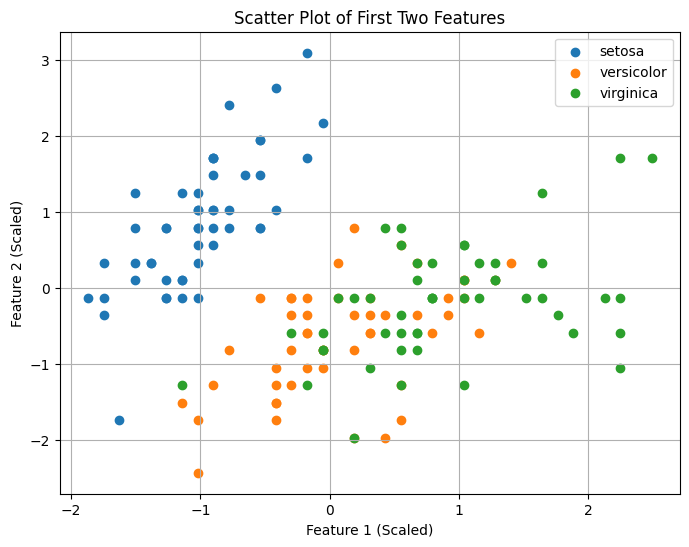

In [5]:
plt.figure(figsize=(8, 6))
for class_label in np.unique(y):
    plt.scatter(
        X_scaled[y == class_label, 0],
        X_scaled[y == class_label, 1],
        label=iris.target_names[class_label]
    )
plt.title("Scatter Plot of First Two Features")
plt.xlabel("Feature 1 (Scaled)")
plt.ylabel("Feature 2 (Scaled)")
plt.legend()
plt.grid()
plt.show()


**CHI2**

In [6]:
chi2_selector = SelectKBest(score_func=chi2, k=2)
X_train_original, X_test_original, _, _ = train_test_split(X, y, test_size=0.3, random_state=42)
X_train_chi2 = chi2_selector.fit_transform(X_train_original, y_train)
X_test_chi2 = chi2_selector.transform(X_test_original)

chi2_scores = pd.DataFrame({
    'Feature': iris.feature_names,
    'Chi2 Score': chi2_selector.scores_
}).sort_values(by='Chi2 Score', ascending=False)

print(chi2_scores)


             Feature  Chi2 Score
2  petal length (cm)   74.306087
3   petal width (cm)   42.212935
0  sepal length (cm)    7.347426
1   sepal width (cm)    2.400689


**Naive Bayes and Decision Tree classifiers**

In [7]:
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train_chi2, y_train)
y_pred_dt = dt_classifier.predict(X_test_chi2)
dt_accuracy = accuracy_score(y_test, y_pred_dt)

nb_classifier = GaussianNB()
nb_classifier.fit(X_train_chi2, y_train)
y_pred_nb = nb_classifier.predict(X_test_chi2)
nb_accuracy = accuracy_score(y_test, y_pred_nb)

print(f"Decision Tree Accuracy: {dt_accuracy}")
print(f"Naïve Bayes Accuracy: {nb_accuracy}")


Decision Tree Accuracy: 1.0
Naïve Bayes Accuracy: 1.0
